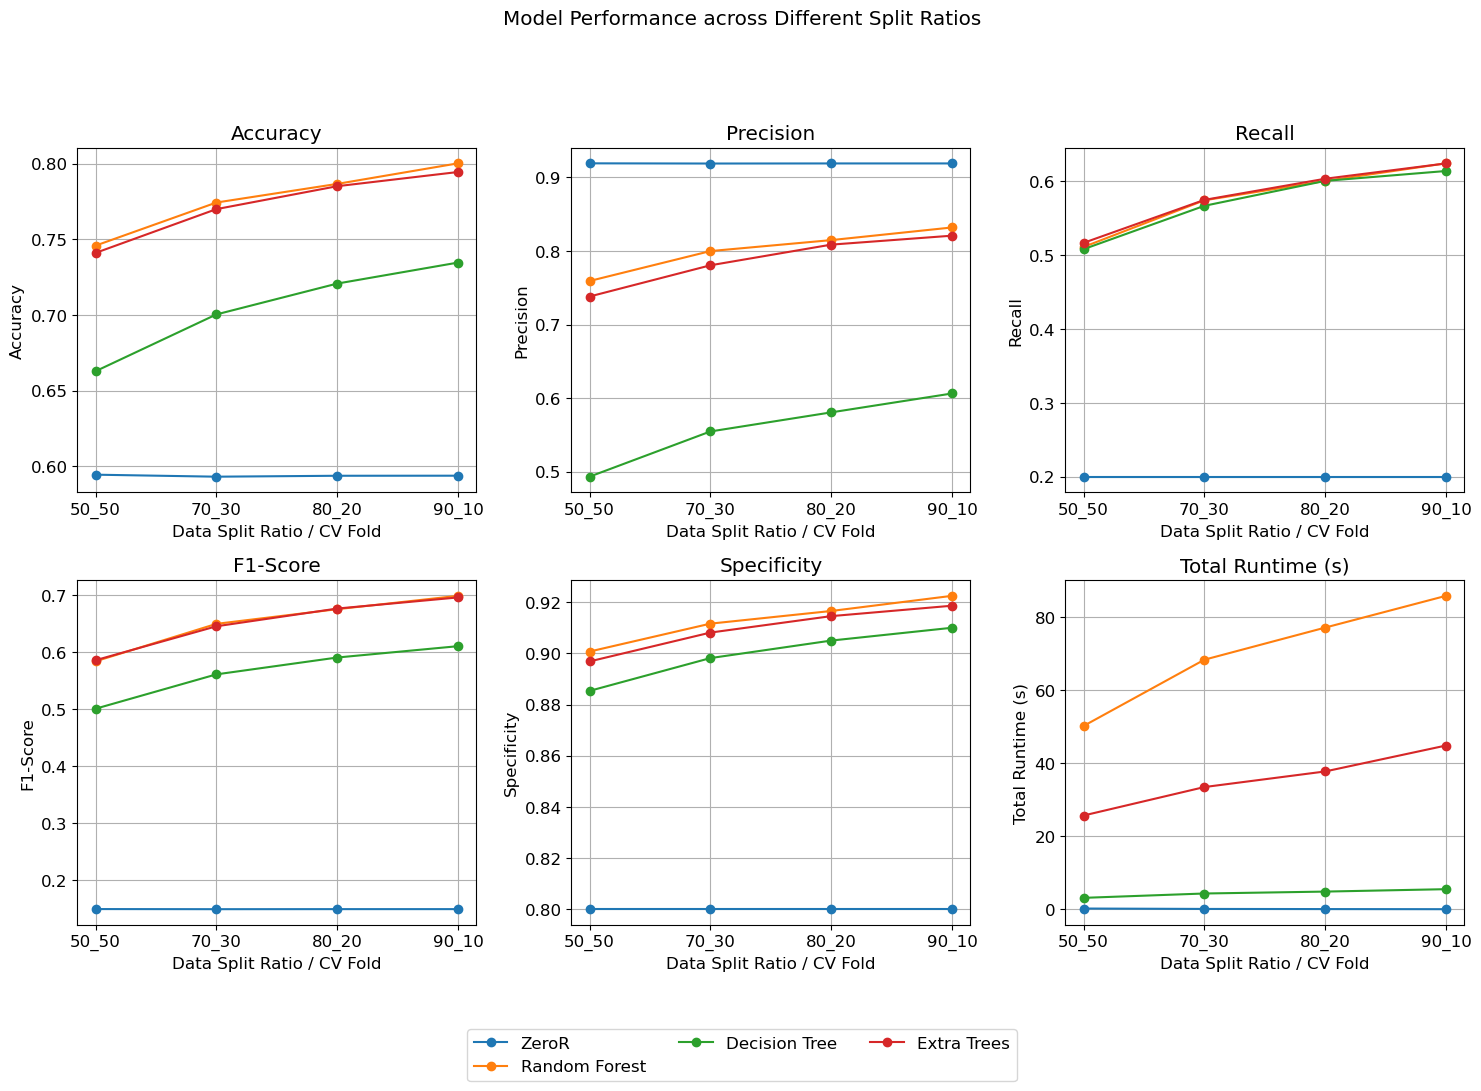

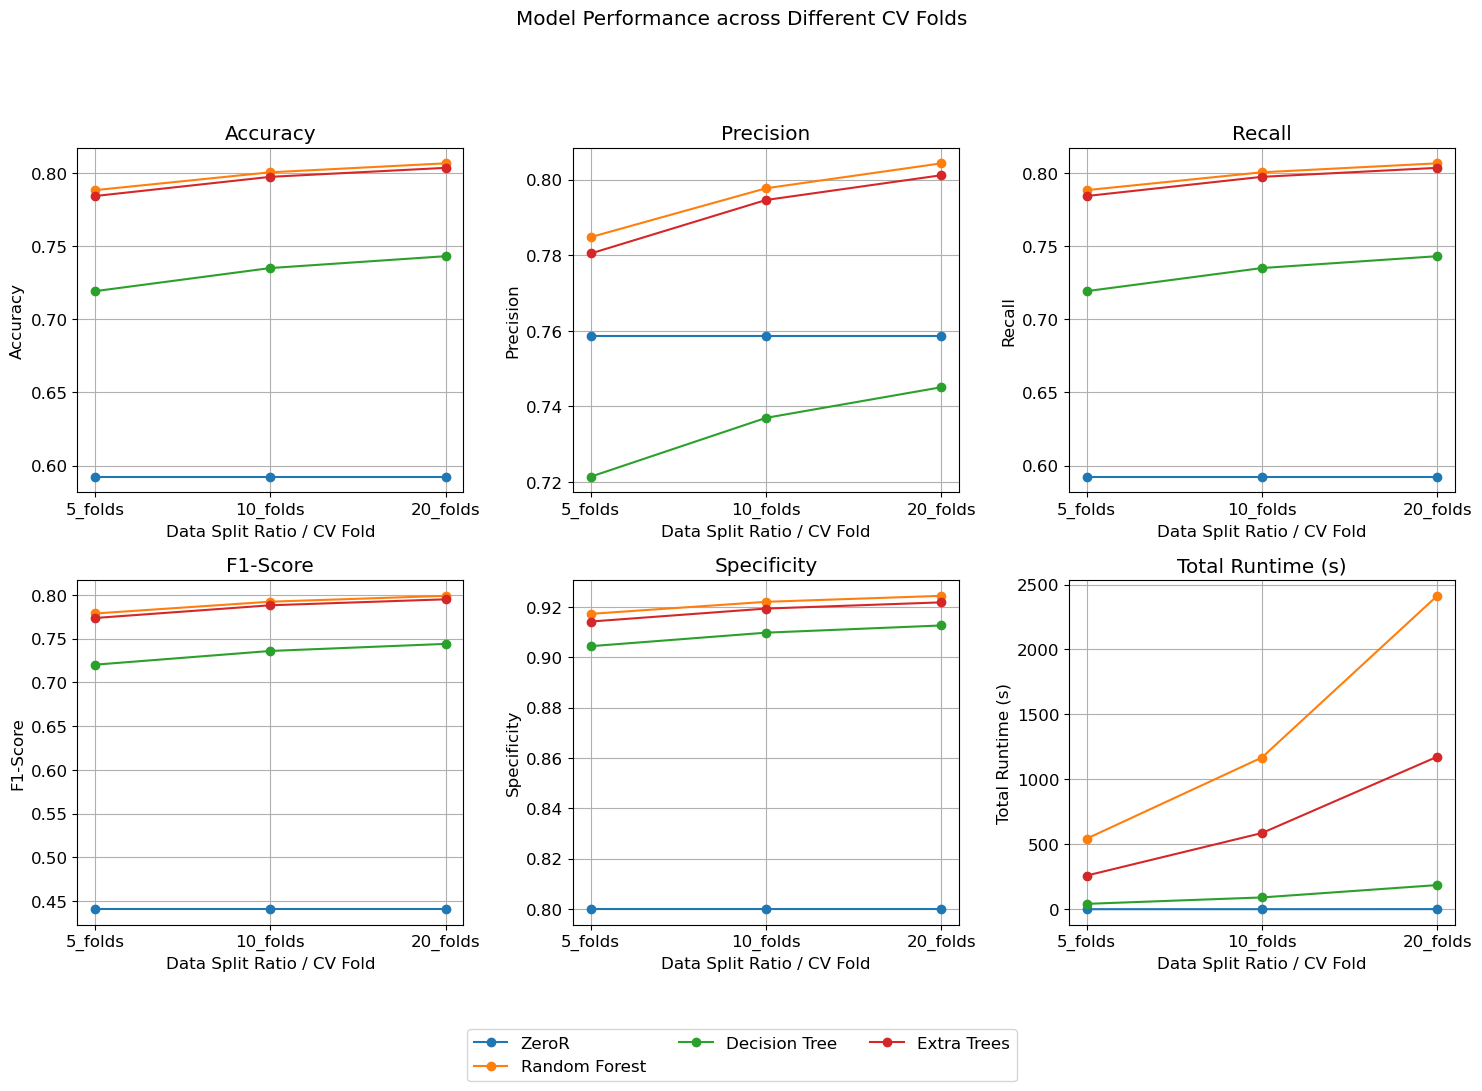

In [40]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define base directories
split_base_dir = "results_Split"
cv_base_dir = "results_CV"

# Define split ratios and folds
split_ratios = ["50_50", "70_30", "80_20", "90_10"]
folds = ["5_folds", "10_folds", "20_folds"]

# Metrics to visualize
metrics = ["Accuracy", "Precision", "Recall", "F1-Score", "Specificity", "Total Runtime (s)"]

def read_split_results():
    split_results = {}
    for ratio in split_ratios:
        folder_path = os.path.join(split_base_dir, ratio)
        result_file = os.path.join(folder_path, f"results_split_{ratio}.csv")
        if os.path.exists(result_file):
            df = pd.read_csv(result_file, index_col=0)
            split_results[ratio] = df
    return split_results

def read_cv_results():
    cv_results = {}
    for fold in folds:
        folder_path = os.path.join(cv_base_dir, fold)
        result_file = os.path.join(folder_path, f"results_cv_{fold}.csv")
        if os.path.exists(result_file):
            df = pd.read_csv(result_file, index_col=0)
            cv_results[fold] = df
    return cv_results

def plot_grouped_results(results, title, save_name):
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
    axes = axes.flatten()
    handles_list = []
    model_labels = []
    color_map = {}  # Dictionary to store consistent colors
    cmap = plt.get_cmap("tab10")  # Use tab10 colormap for consistent colors
    
    for i, metric in enumerate(metrics):
        if metric in results[list(results.keys())[0]].columns:
            ax = axes[i]
            models = results[list(results.keys())[0]].index
            
            for j, model in enumerate(models):
                if model not in color_map:
                    color_map[model] = cmap(len(color_map) % 10)  # Assign consistent color
                values = [results[key].loc[model, metric] for key in results.keys() if metric in results[key].columns]
                line, = ax.plot(results.keys(), values, marker='o', label=model, color=color_map[model])
                if i == 0:  # Collect legend handles only once
                    handles_list.append(line)
                    model_labels.append(model)
            
            ax.set_xlabel("Data Split Ratio / CV Fold")
            ax.set_ylabel(metric)
            ax.set_title(metric)
            ax.grid()
    
    # Create one legend for all plots with correct colors
    fig.legend(handles_list, model_labels, loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=3)
    
    plt.suptitle(title)
    plt.tight_layout(rect=[0, 0, 1, 0.92])  # Adjust rect to fit legend
    plt.savefig(save_name, bbox_inches='tight')  # Ensure legend is saved
    plt.show()

# Read results
split_results = read_split_results()
cv_results = read_cv_results()

# Plot grouped split-based results
plot_grouped_results(split_results, "Model Performance across Different Split Ratios", "split_metrics.png")

# Plot grouped cross-validation results
plot_grouped_results(cv_results, "Model Performance across Different CV Folds", "cv_metrics.png")

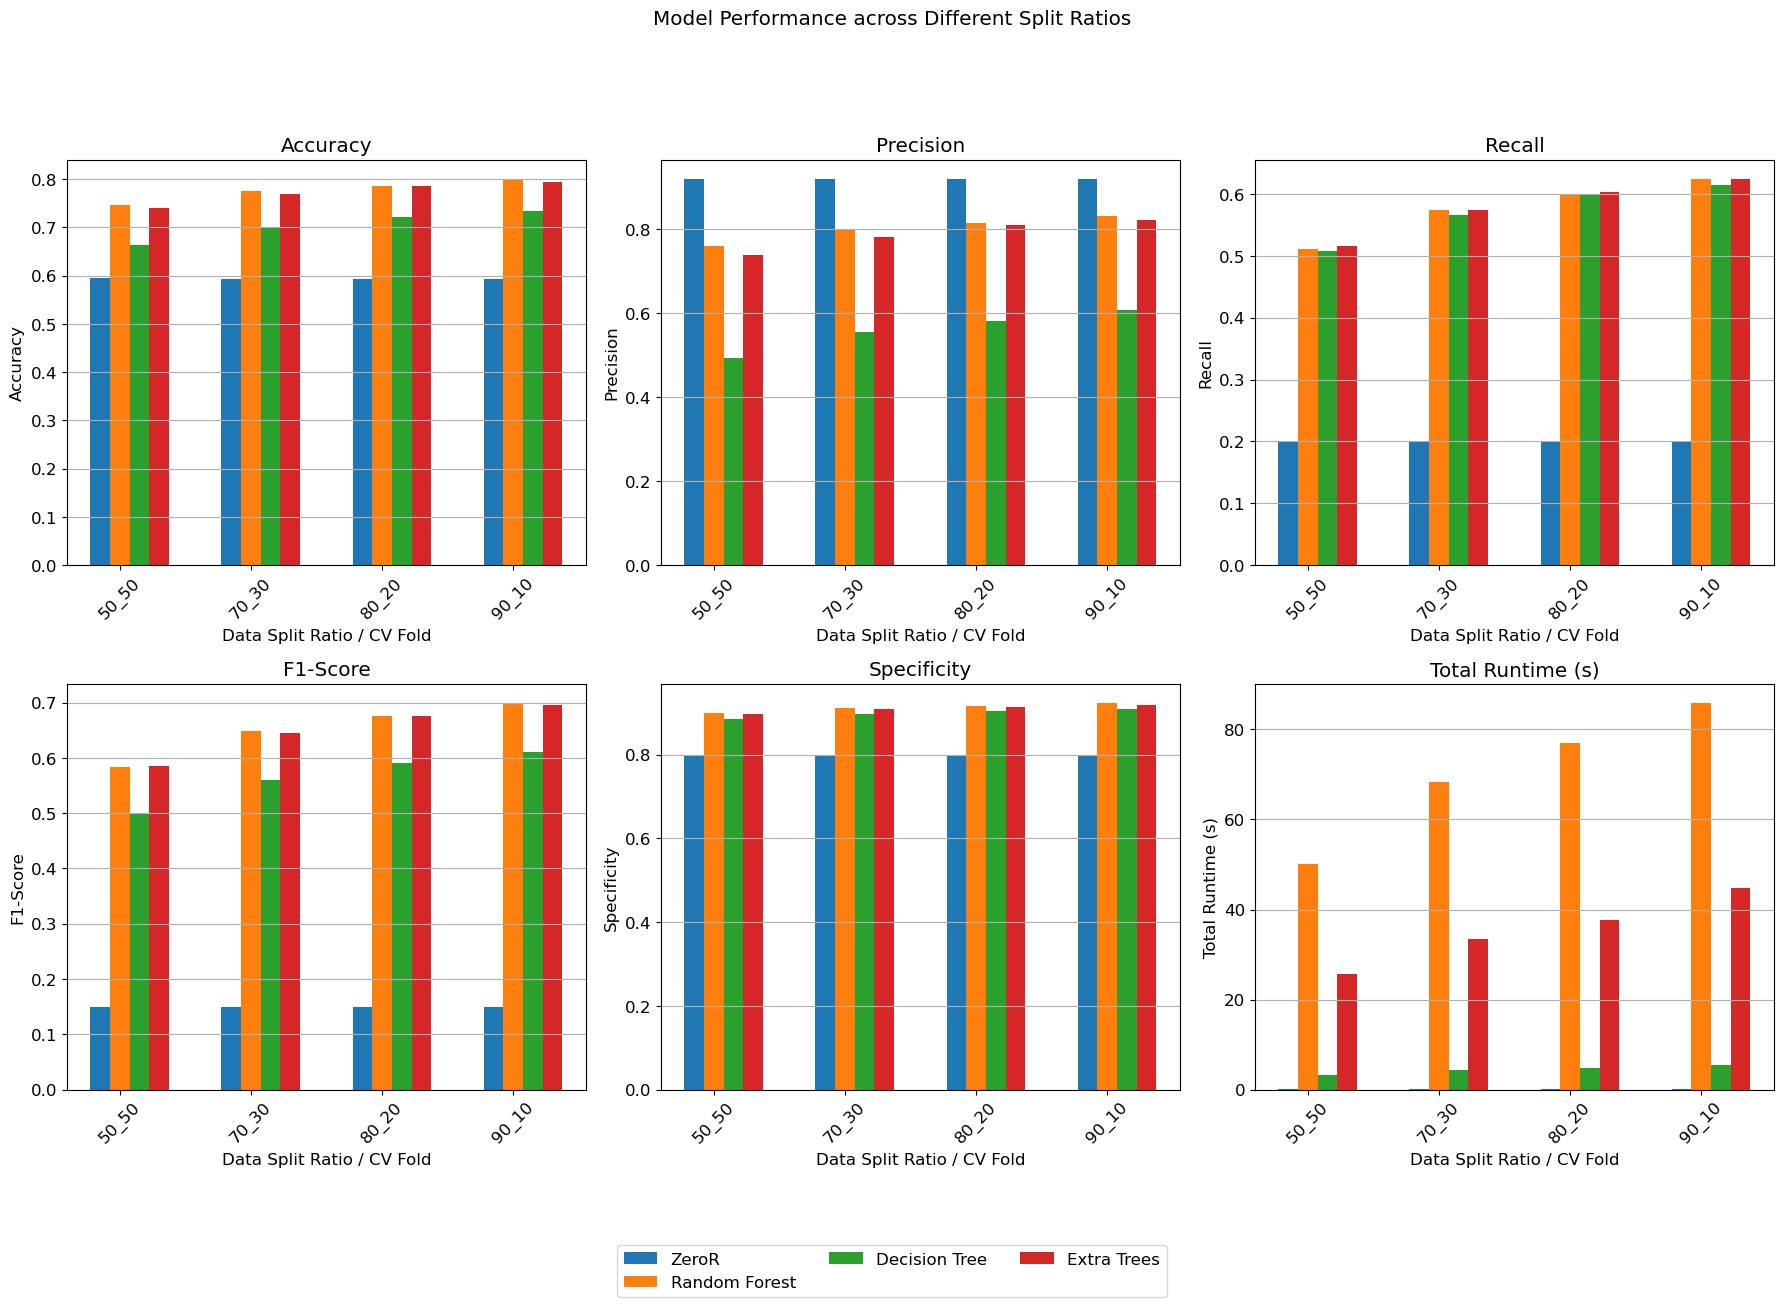

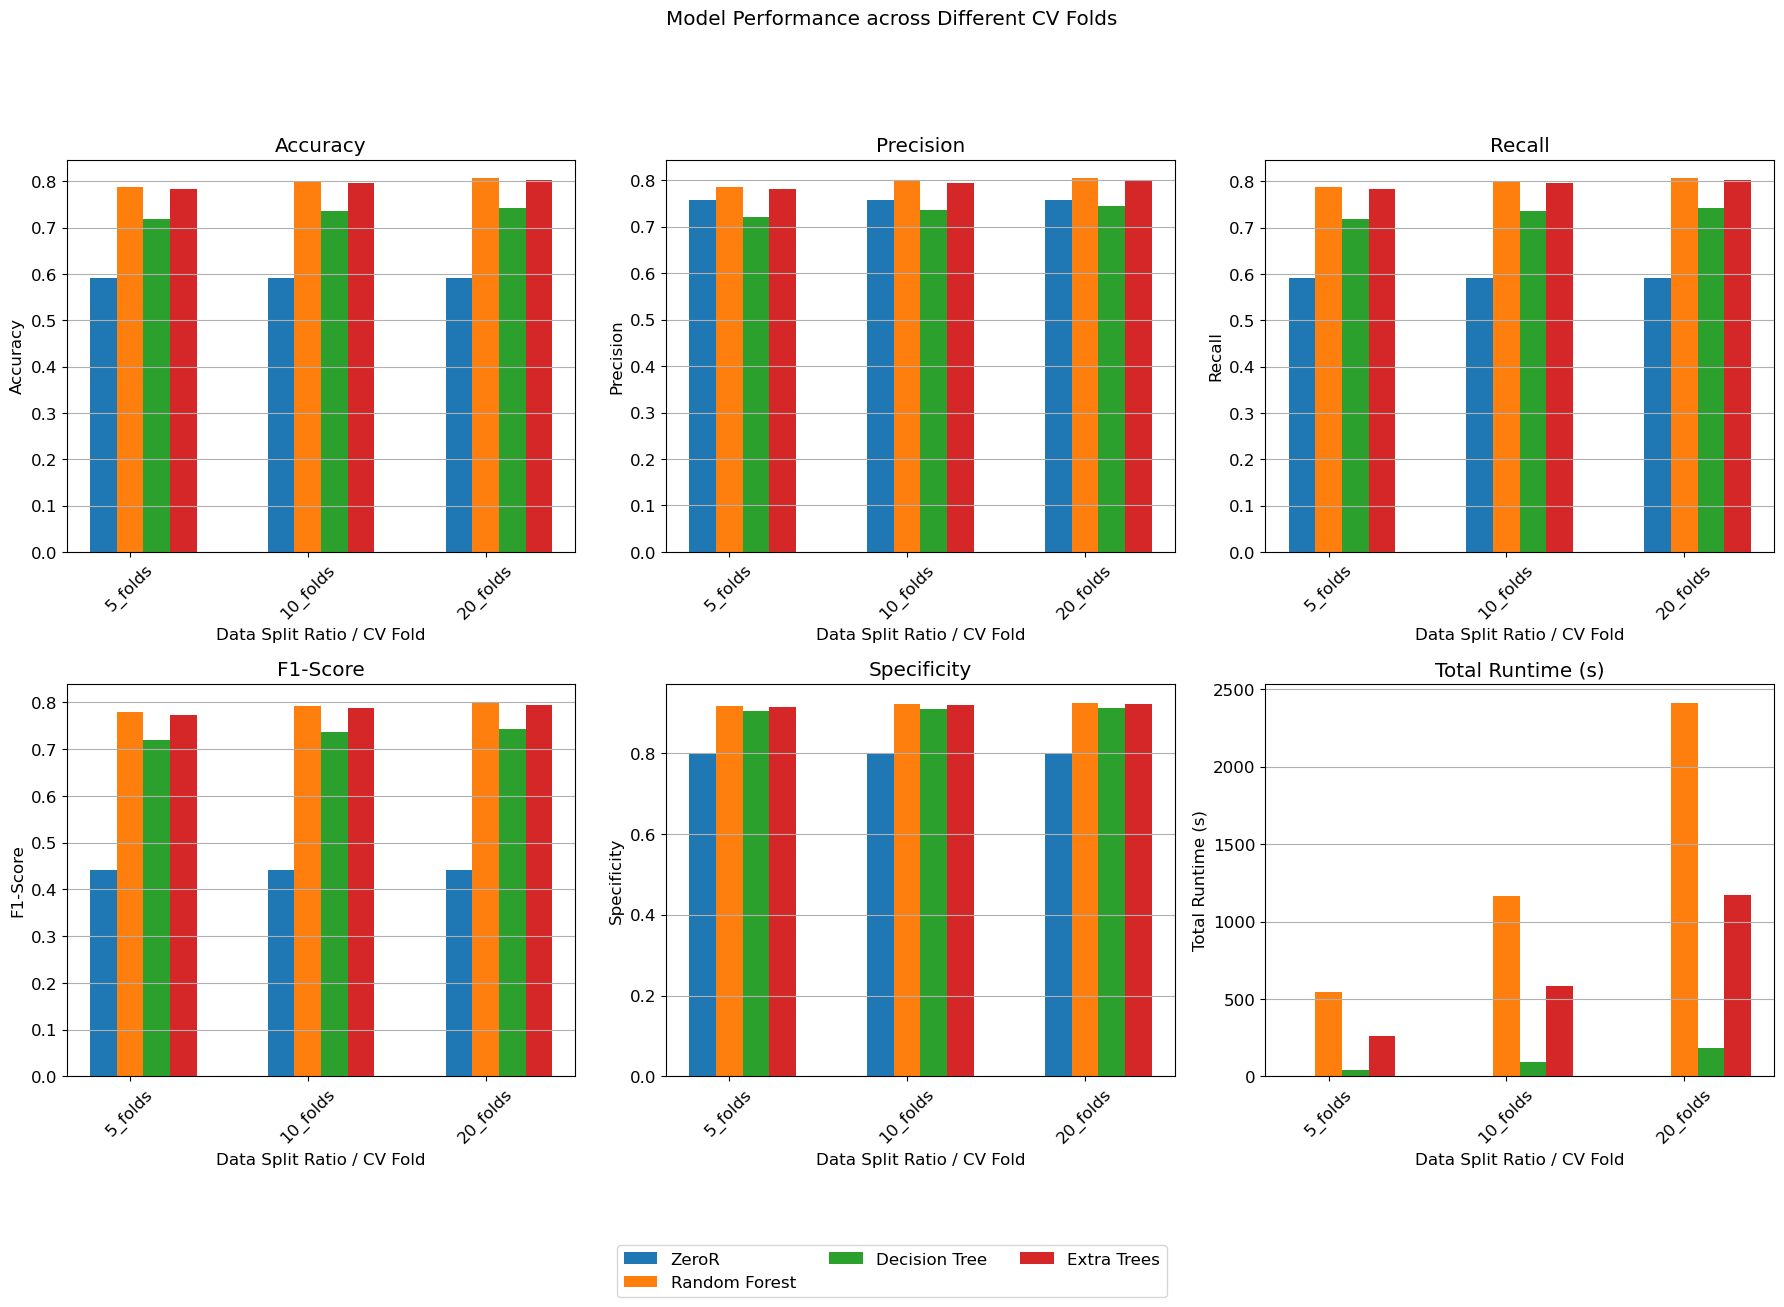

In [41]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define base directories
split_base_dir = "results_Split"
cv_base_dir = "results_CV"

# Define split ratios and folds
split_ratios = ["50_50", "70_30", "80_20", "90_10"]
folds = ["5_folds", "10_folds", "20_folds"]

# Metrics to visualize
metrics = ["Accuracy", "Precision", "Recall", "F1-Score", "Specificity", "Total Runtime (s)"]

def read_split_results():
    split_results = {}
    for ratio in split_ratios:
        folder_path = os.path.join(split_base_dir, ratio)
        result_file = os.path.join(folder_path, f"results_split_{ratio}.csv")
        if os.path.exists(result_file):
            df = pd.read_csv(result_file, index_col=0)
            split_results[ratio] = df
    return split_results

def read_cv_results():
    cv_results = {}
    for fold in folds:
        folder_path = os.path.join(cv_base_dir, fold)
        result_file = os.path.join(folder_path, f"results_cv_{fold}.csv")
        if os.path.exists(result_file):
            df = pd.read_csv(result_file, index_col=0)
            cv_results[fold] = df
    return cv_results

def plot_bar_results(results, title, save_name):
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
    axes = axes.flatten()
    handles_list = []
    model_labels = []
    color_map = {}  # Dictionary to store consistent colors
    cmap = plt.get_cmap("tab10")  # Use tab10 colormap for consistent colors
    
    for i, metric in enumerate(metrics):
        if metric in results[list(results.keys())[0]].columns:
            ax = axes[i]
            models = results[list(results.keys())[0]].index
            x_labels = list(results.keys())
            width = 0.15  # Width of bars
            
            for j, model in enumerate(models):
                if model not in color_map:
                    color_map[model] = cmap(len(color_map) % 10)  # Assign consistent color
                values = [results[key].loc[model, metric] for key in results.keys() if metric in results[key].columns]
                x_positions = [x + j * width for x in range(len(x_labels))]
                bars = ax.bar(x_positions, values, width=width, label=model, color=color_map[model])
                if i == 0:  # Collect legend handles only once
                    handles_list.append(bars[0])
                    model_labels.append(model)
            
            ax.set_xticks([x + width for x in range(len(x_labels))])
            ax.set_xticklabels(x_labels, rotation=45)
            ax.set_xlabel("Data Split Ratio / CV Fold")
            ax.set_ylabel(metric)
            ax.set_title(metric)
            ax.grid(axis='y')
    
    # Create one legend for all plots with correct colors
    fig.legend(handles_list, model_labels, loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=3)
    
    plt.suptitle(title)
    plt.tight_layout(rect=[0, 0, 1, 0.92])  # Adjust rect to fit legend
    plt.savefig(save_name, bbox_inches='tight')  # Ensure legend is saved
    plt.show()

# Read results
split_results = read_split_results()
cv_results = read_cv_results()

# Plot split-based results as bar plots
plot_bar_results(split_results, "Model Performance across Different Split Ratios", "split_metrics_bar.png")

# Plot cross-validation results as bar plots
plot_bar_results(cv_results, "Model Performance across Different CV Folds", "cv_metrics_bar.png")


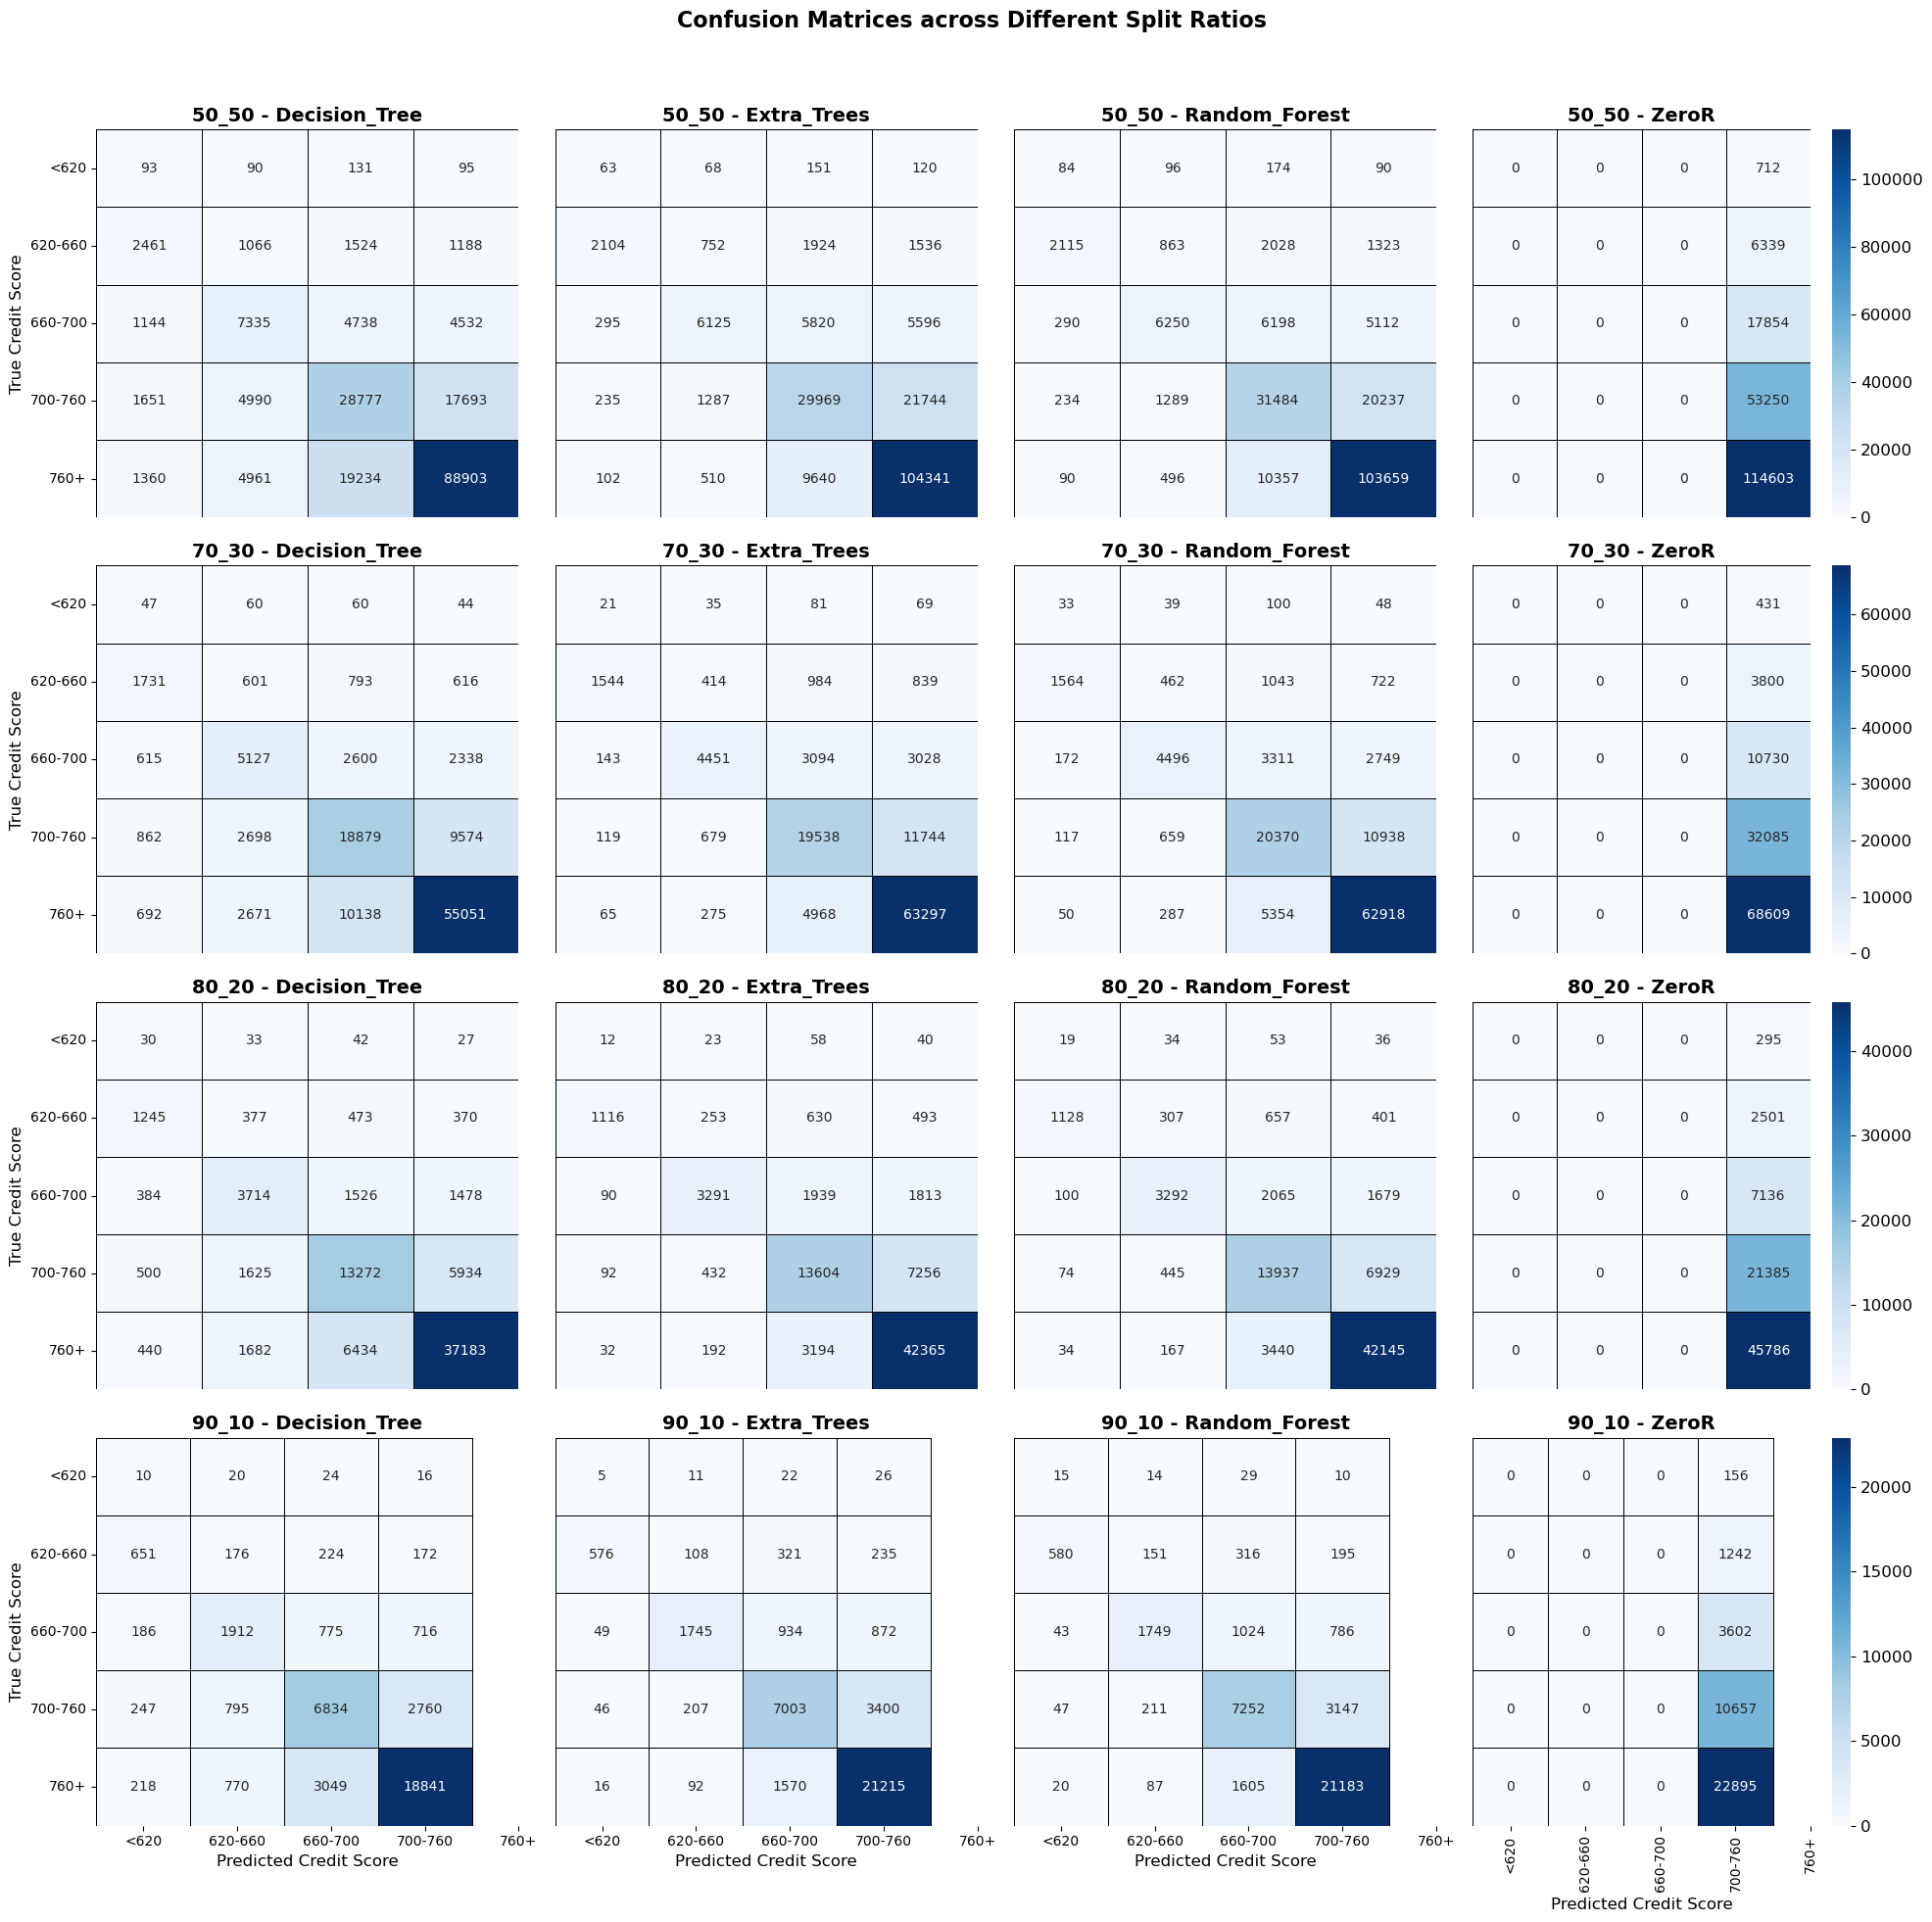

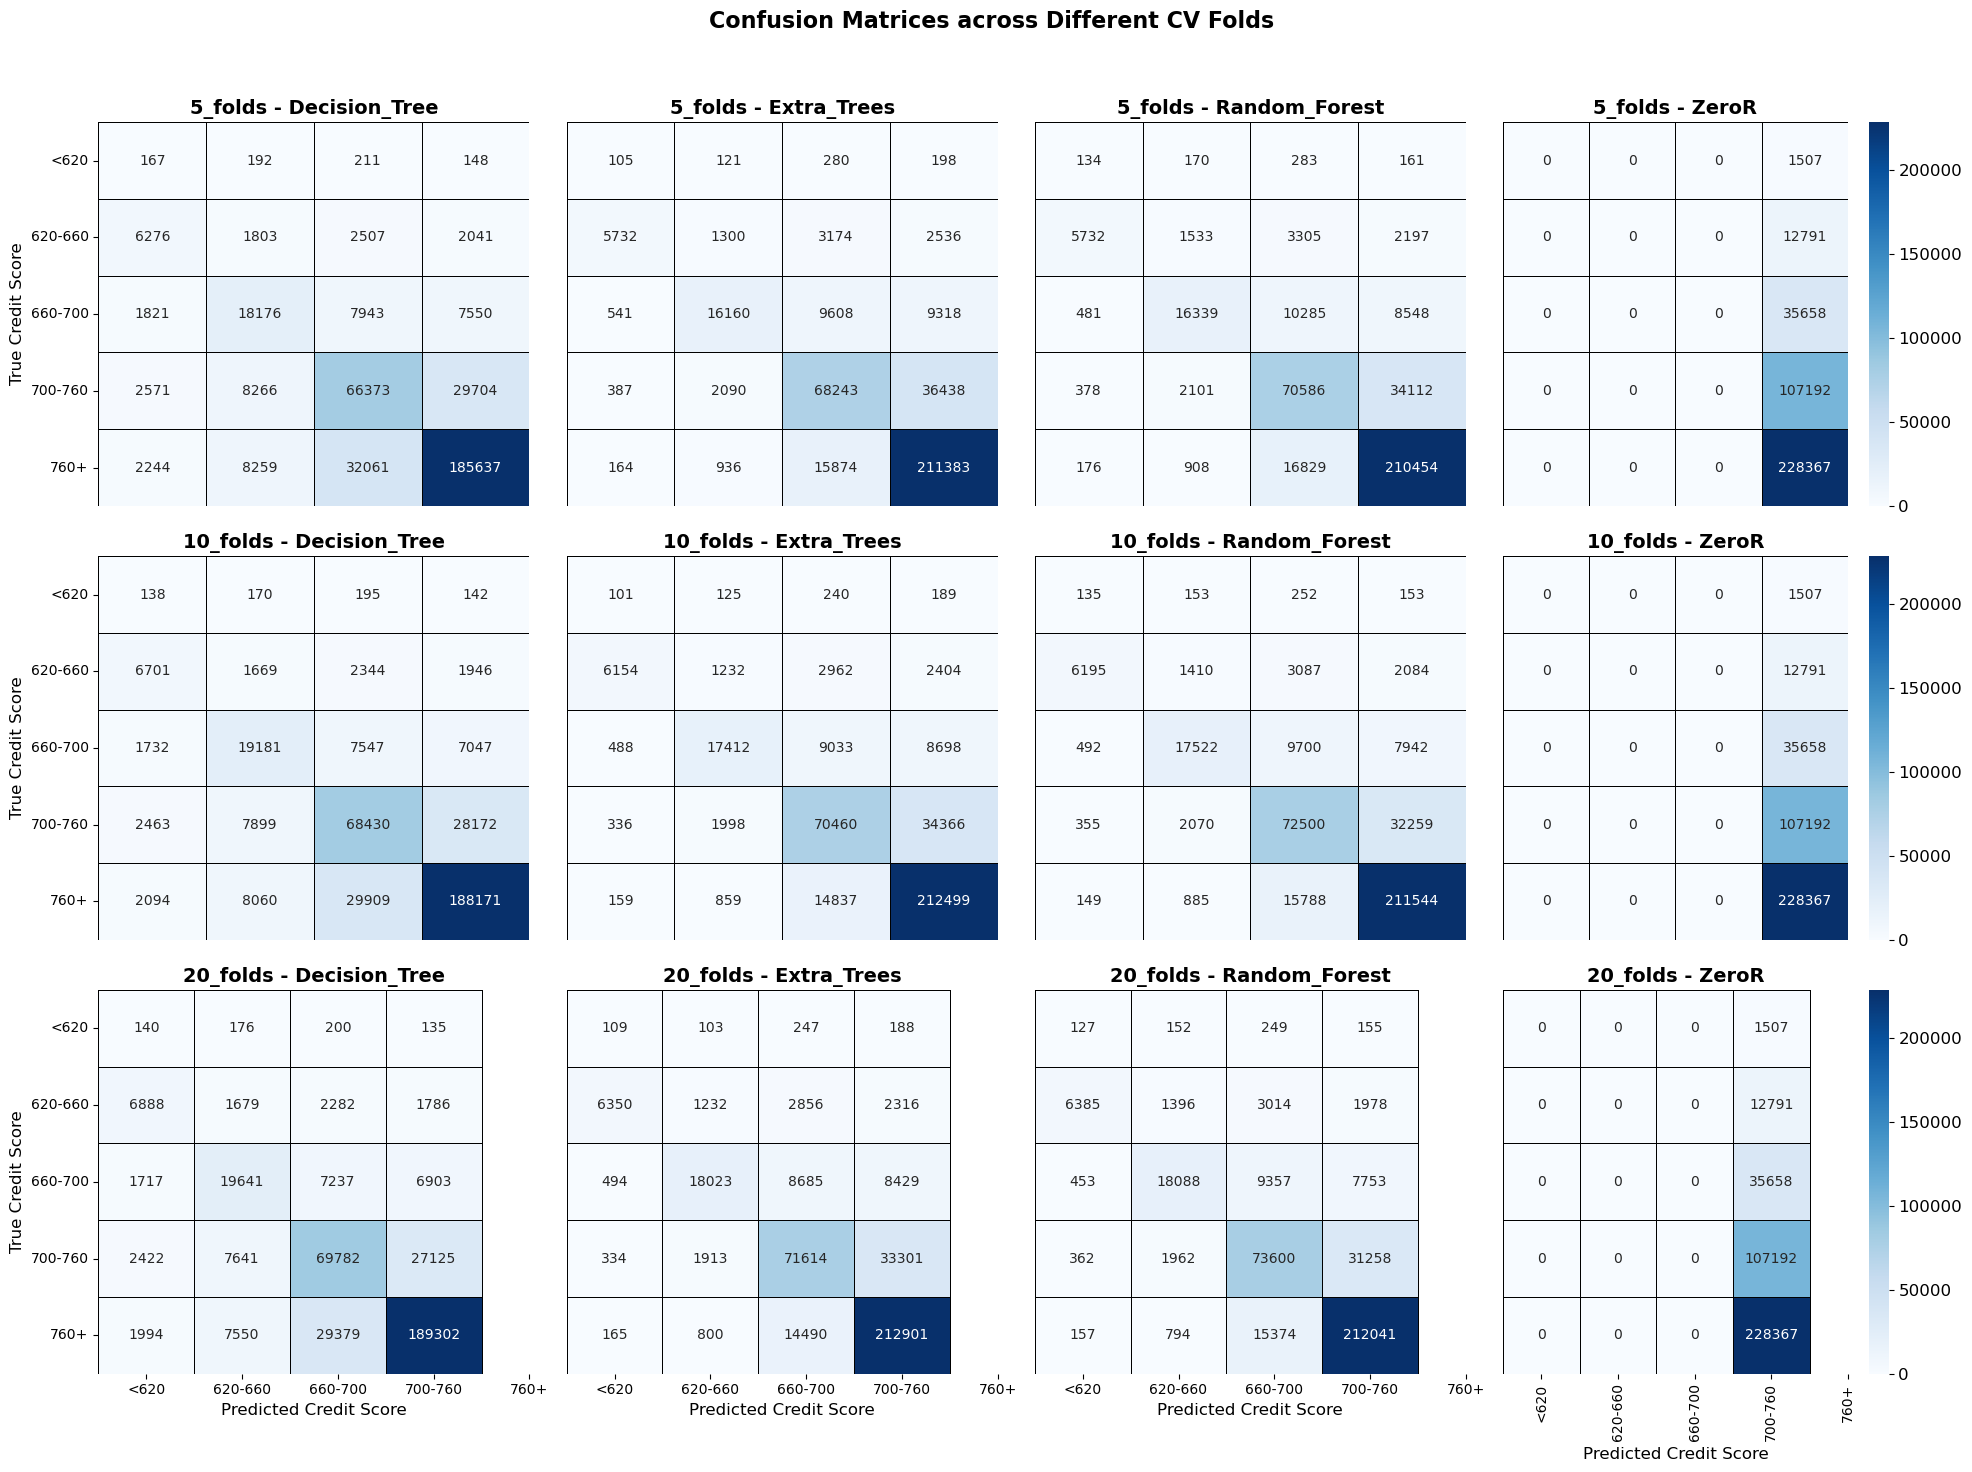

In [22]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define base directories
split_base_dir = "results_Split"
cv_base_dir = "results_CV"

# Define split ratios and folds
split_ratios = ["50_50", "70_30", "80_20", "90_10"]
folds = ["5_folds", "10_folds", "20_folds"]

# Models to visualize
models = ["Decision_Tree", "Extra_Trees", "Random_Forest", "ZeroR"]

# Define credit score category labels
labels = ["<620", "620-660", "660-700", "700-760", "760+"]

def read_confusion_matrices(base_dir, scenarios, is_cv=False):
    matrices = {}
    for scenario in scenarios:
        matrices[scenario] = {}
        folder_path = os.path.join(base_dir, scenario)
        for model in models:
            if is_cv:
                matrix_file = os.path.join(folder_path, f"conf_matrix_cv_{scenario}_{model}.csv")
            else:
                matrix_file = os.path.join(folder_path, f"conf_matrix_{scenario}_{model}.csv")
            
            if os.path.exists(matrix_file):
                df = pd.read_csv(matrix_file, header=None)
                df = df.iloc[1:, 1:]
                matrices[scenario][model] = df
    return matrices

def plot_confusion_matrices(matrices, title, save_name):
    num_scenarios = len(matrices)
    num_models = len(models)
    fig, axes = plt.subplots(num_scenarios, num_models, figsize=(num_models * 5, num_scenarios * 5))
    plt.rc("font", size=12)  # Increase font size for readability
    
    for i, scenario in enumerate(matrices.keys()):
        for j, model in enumerate(models):
            ax = axes[i, j] if num_scenarios > 1 else axes[j]
            if model in matrices[scenario]:
                cbar = j == num_models - 1  # Show colorbar only for the last column
                sns.heatmap(matrices[scenario][model], annot=True, fmt="d", cmap="Blues", ax=ax,
                            xticklabels=labels if i == num_scenarios - 1 else [],
                            yticklabels=labels if j == 0 else [],
                            linewidths=0.5, linecolor='black', annot_kws={"size": 10},
                            cbar=cbar)  # Hide redundant colorbars
                ax.set_title(f"{scenario} - {model}", fontsize=14, fontweight='bold')
                if i == num_scenarios - 1:
                    ax.set_xlabel("Predicted Credit Score", fontsize=12)
                if j == 0:
                    ax.set_ylabel("True Credit Score", fontsize=12)
                ax.tick_params(axis='both', which='major', labelsize=10)
    
    plt.suptitle(title, fontsize=16, fontweight='bold')
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.savefig(save_name, dpi=500)
    plt.show()

# Read confusion matrices
split_matrices = read_confusion_matrices(split_base_dir, split_ratios)
cv_matrices = read_confusion_matrices(cv_base_dir, folds, is_cv=True)

# Plot grouped confusion matrices for split-based results
plot_confusion_matrices(split_matrices, "Confusion Matrices across Different Split Ratios", "split_conf_matrices.png")

# Plot grouped confusion matrices for cross-validation results
plot_confusion_matrices(cv_matrices, "Confusion Matrices across Different CV Folds", "cv_conf_matrices.png")


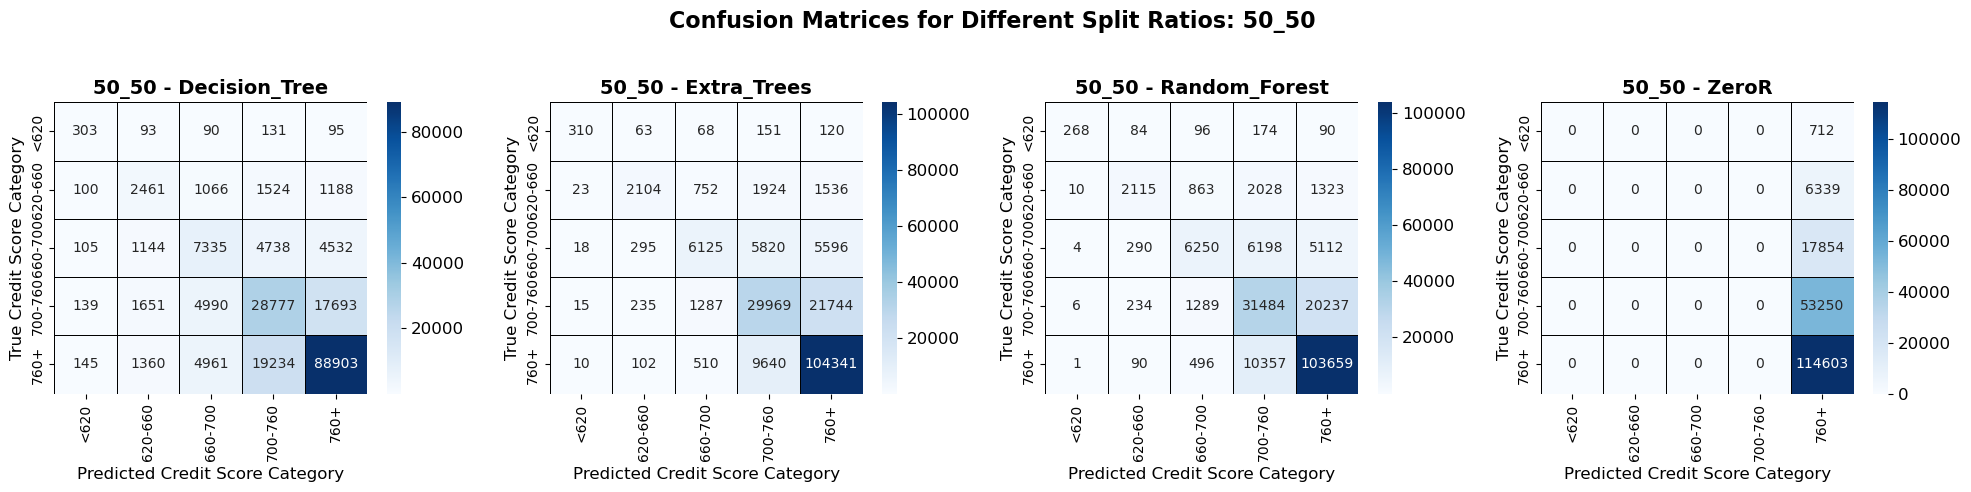

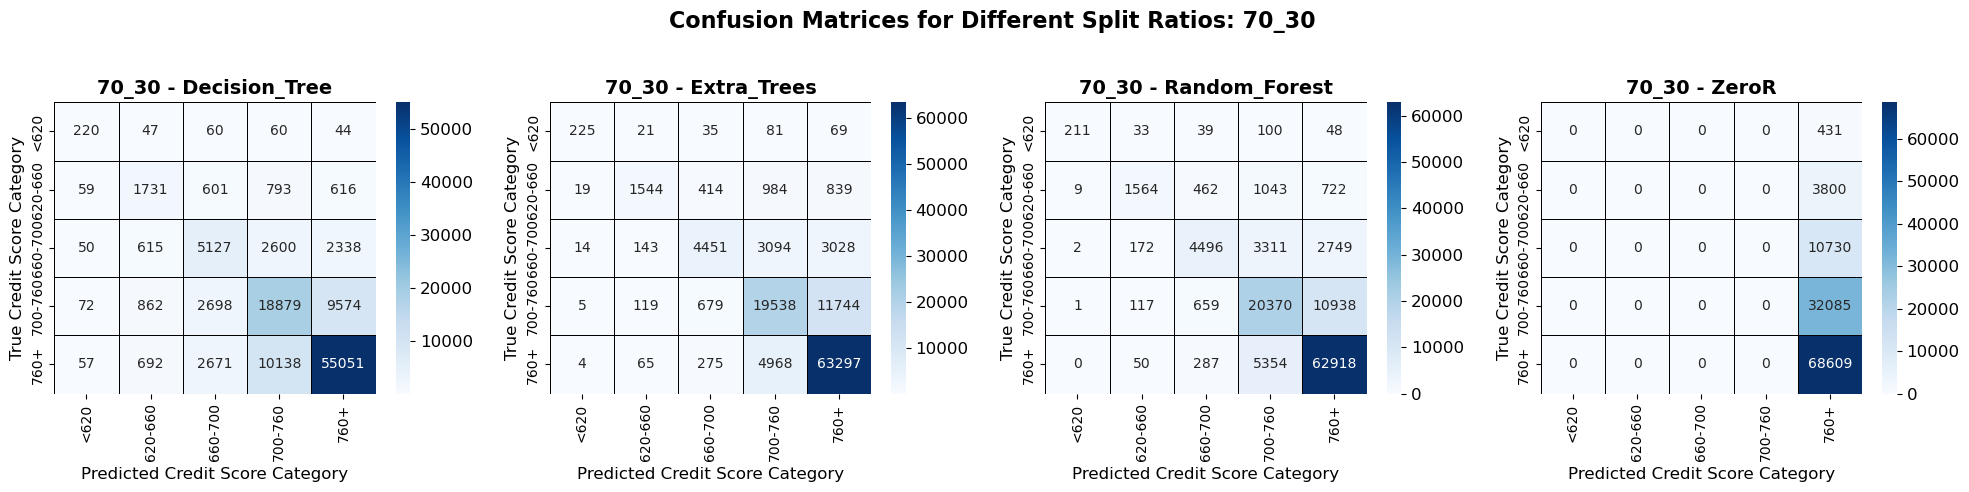

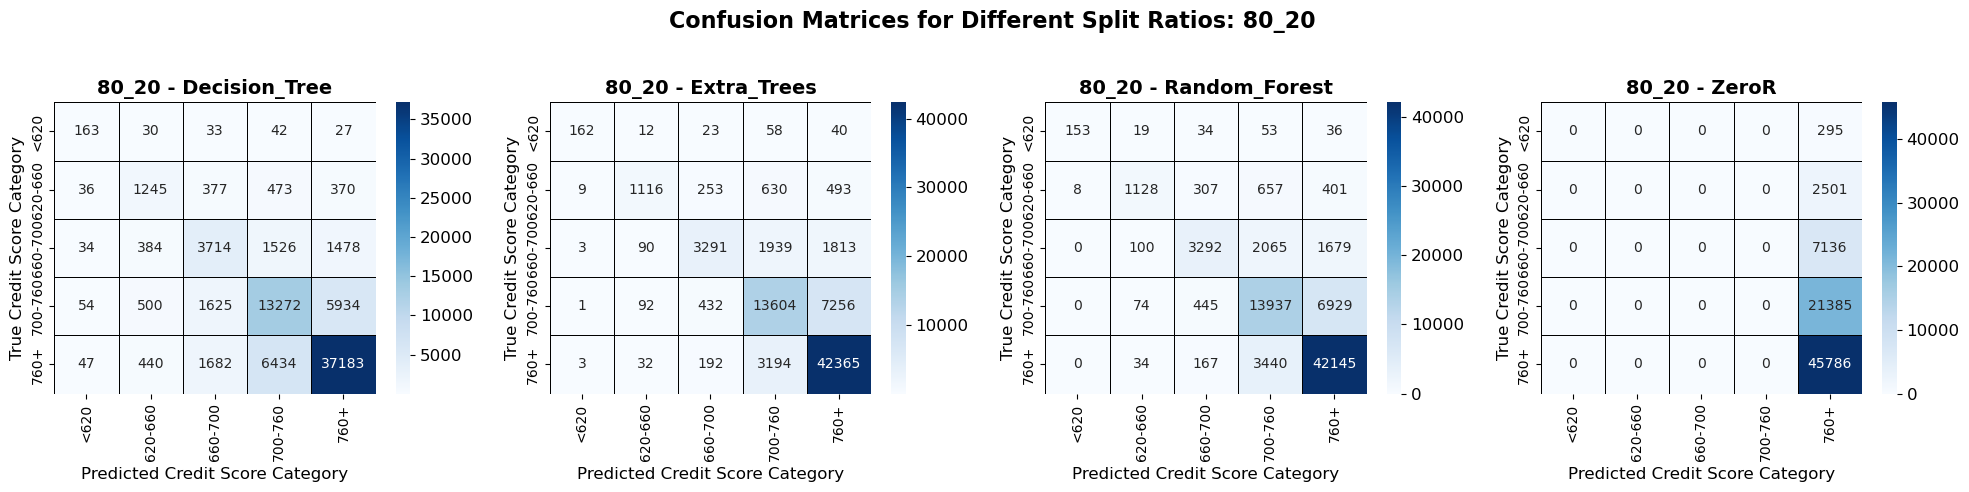

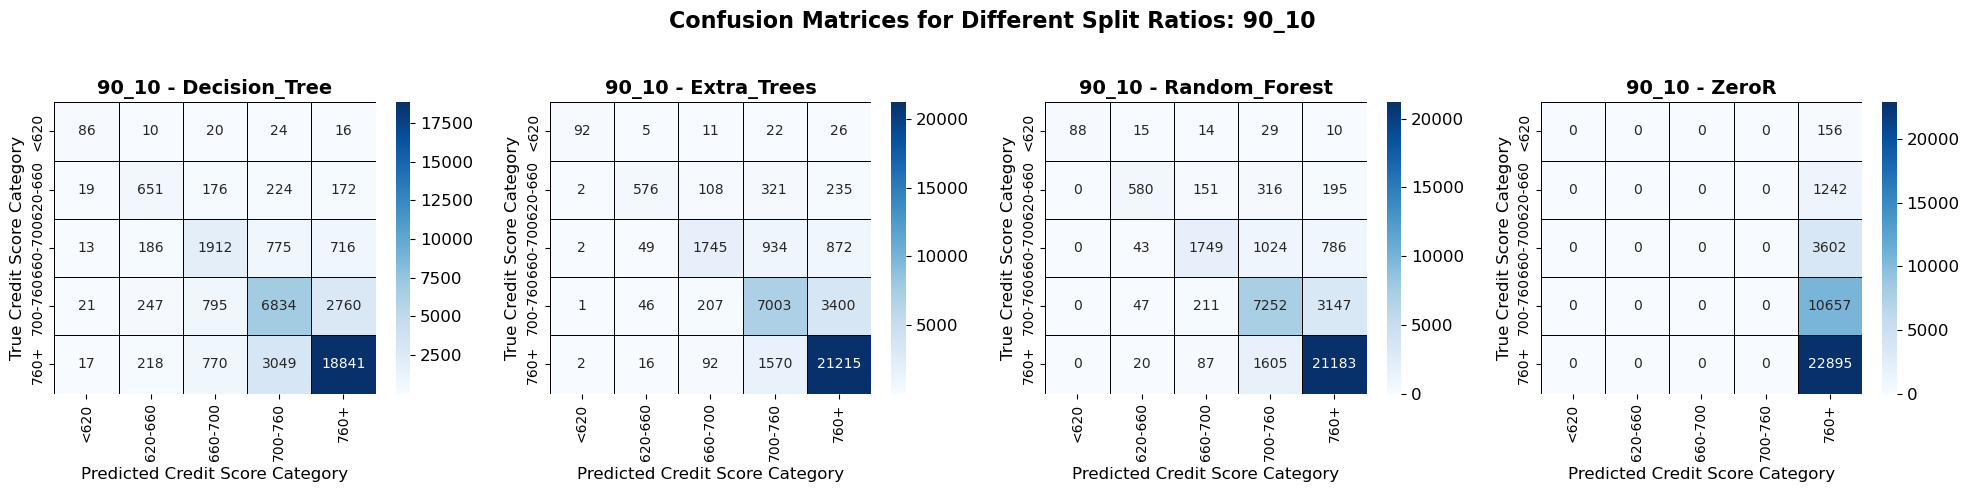

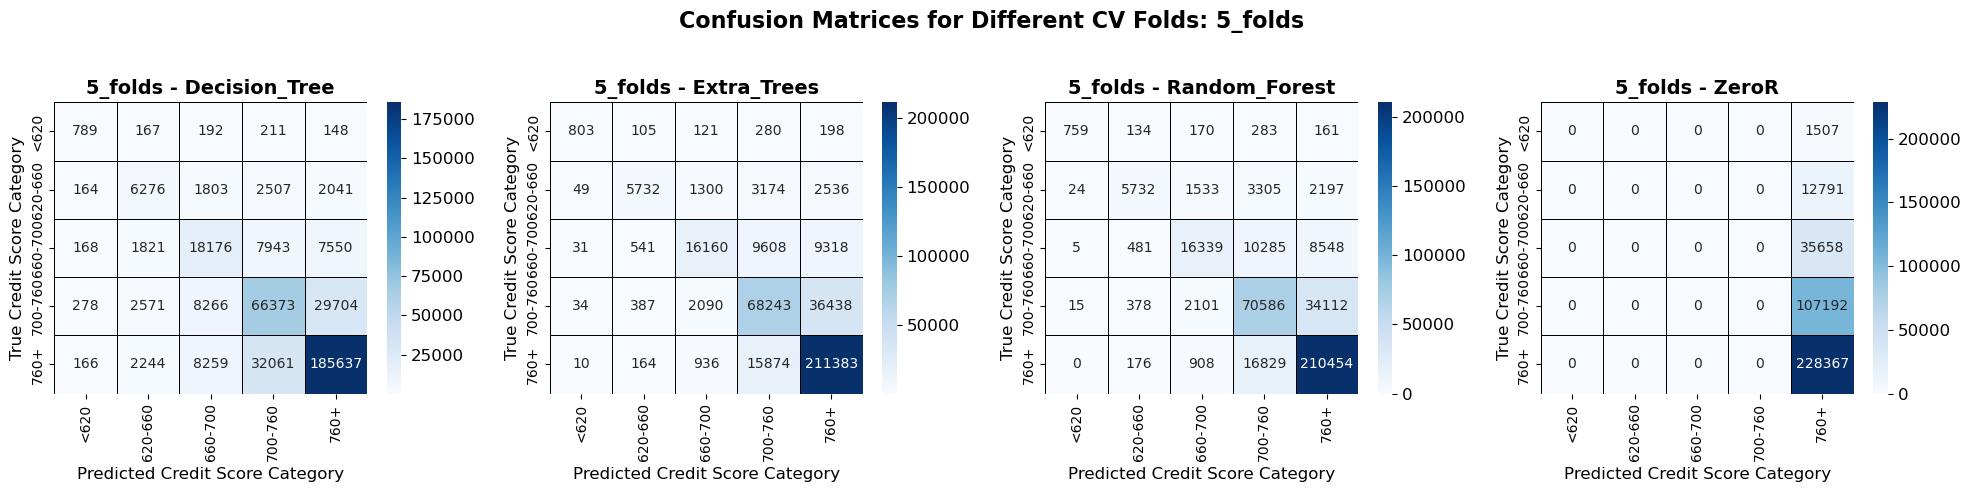

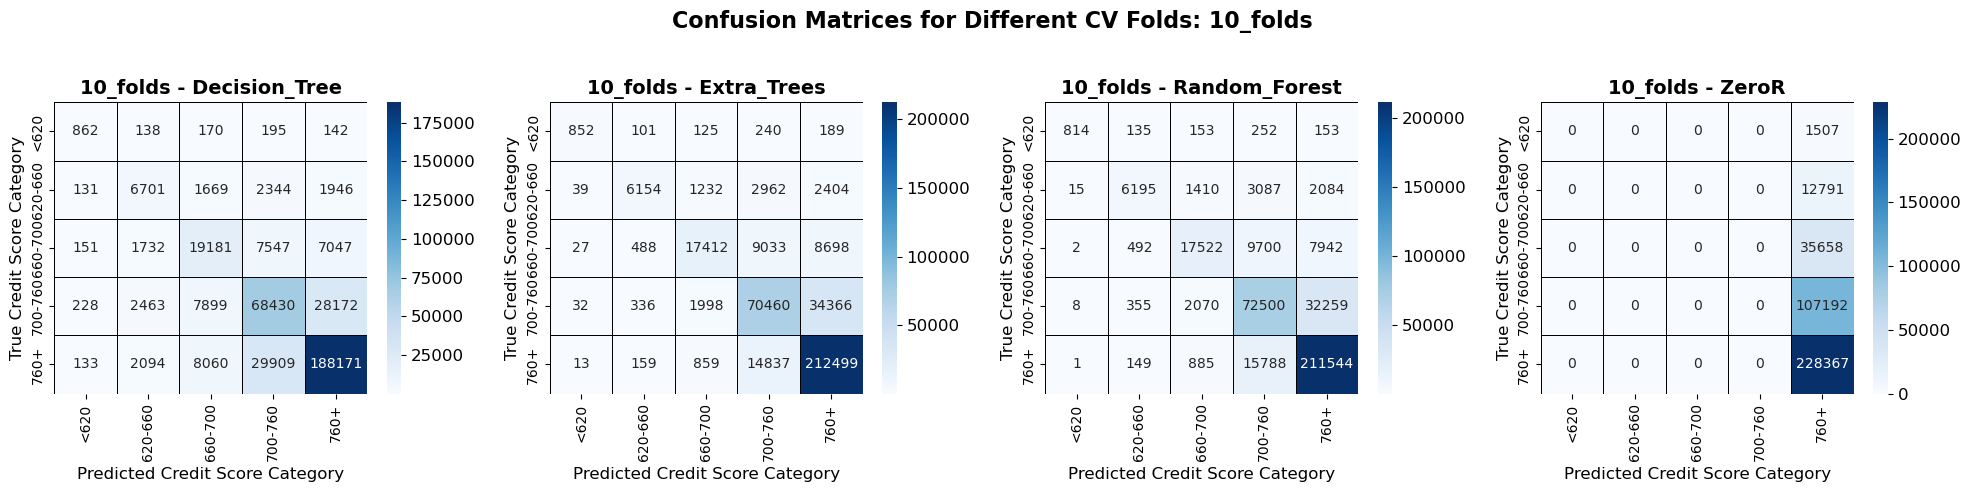

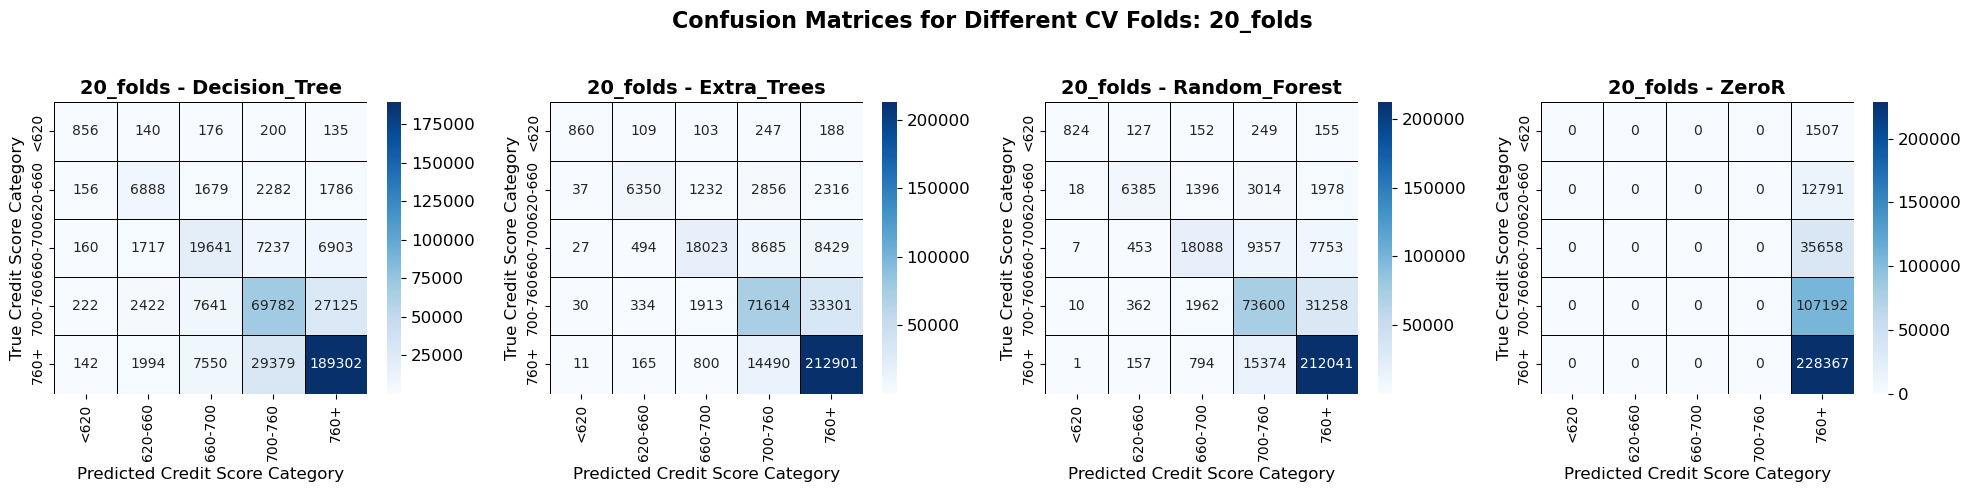

In [ ]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define base directories
split_base_dir = "results_Split"
cv_base_dir = "results_CV"

# Define split ratios and folds
split_ratios = ["50_50", "70_30", "80_20", "90_10"]
folds = ["5_folds", "10_folds", "20_folds"]

# Models to visualize
models = ["Decision_Tree", "Extra_Trees", "Random_Forest", "ZeroR"]

# Define credit score category labels
labels = ["<620", "620-660", "660-700", "700-760", "760+"]

def read_confusion_matrices(base_dir, scenarios, is_cv=False):
    matrices = {}
    for scenario in scenarios:
        matrices[scenario] = {}
        folder_path = os.path.join(base_dir, scenario)
        for model in models:
            if is_cv:
                matrix_file = os.path.join(folder_path, f"conf_matrix_cv_{scenario}_{model}.csv")
            else:
                matrix_file = os.path.join(folder_path, f"conf_matrix_{scenario}_{model}.csv")
            
            if os.path.exists(matrix_file):
                df = pd.read_csv(matrix_file, header=None)
                df = df.iloc[1:, 0:]  # Remove index row and column
                matrices[scenario][model] = df
    return matrices

def plot_confusion_matrices_separate(matrices, base_title, save_prefix):
    for scenario, model_matrices in matrices.items():
        fig, axes = plt.subplots(1, len(models), figsize=(len(models) * 6, 6))
        plt.rc("font", size=12)  # Increase font size for readability
        
        for j, model in enumerate(models):
            ax = axes[j] if len(models) > 1 else axes
            if model in model_matrices:
                sns.heatmap(model_matrices[model], annot=True, fmt="d", cmap="Blues", ax=ax,
                            xticklabels=labels, yticklabels=labels,
                            linewidths=0.5, linecolor='black', annot_kws={"size": 10}, cbar=True)
                ax.set_title(f"{scenario} - {model}", fontsize=14, fontweight='bold')
                ax.set_xlabel("Predicted Credit Score Category", fontsize=12)
                ax.set_ylabel("True Credit Score Category", fontsize=12)
                ax.tick_params(axis='both', which='major', labelsize=10)
        
        plt.suptitle(f"{base_title}: {scenario}", fontsize=16, fontweight='bold')
        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.savefig(f"{save_prefix}_{scenario}.png", dpi=300)
        plt.show()

# Read confusion matrices
split_matrices = read_confusion_matrices(split_base_dir, split_ratios)
cv_matrices = read_confusion_matrices(cv_base_dir, folds, is_cv=True)

# Plot separate confusion matrices per scenario for split-based results
plot_confusion_matrices_separate(split_matrices, "Confusion Matrices for Different Split Ratios", "split_conf_matrices")

# Plot separate confusion matrices per scenario for cross-validation results
plot_confusion_matrices_separate(cv_matrices, "Confusion Matrices for Different CV Folds", "cv_conf_matrices")


In [31]:
import os
import pandas as pd

# Define base directories
split_base_dir = "results_Split"
cv_base_dir = "results_CV"

# Define split ratios and folds
split_ratios = ["50_50", "70_30", "80_20", "90_10"]
folds = ["5_folds", "10_folds", "20_folds"]

# Extract model names dynamically from files
sample_file = os.path.join(split_base_dir, split_ratios[0], f"results_split_{split_ratios[0]}.csv")
if os.path.exists(sample_file):
    df_sample = pd.read_csv(sample_file, index_col=0)
    models = df_sample.index.tolist()
else:
    models = []

# Metrics to include
metrics = ["Accuracy", "Precision", "Recall", "F1-Score", "Specificity", "Total Runtime (s)"]

# Collect split-based results
split_data = []
for ratio in split_ratios:
    result_file = os.path.join(split_base_dir, ratio, f"results_split_{ratio}.csv")
    if os.path.exists(result_file):
        df = pd.read_csv(result_file, index_col=0)
        for model in models:
            if model in df.index:
                row = df.loc[model, metrics].to_list()
                split_data.append([model, ratio.replace("_", "/")] + row)

# Create DataFrame for split results
split_df = pd.DataFrame(split_data, columns=["Classifier", "Percentage Split (Training/Testing)"] + metrics)
split_df.to_csv("aggregated_split_results.csv", index=False)

# Collect CV-based results
cv_data = []
for fold in folds:
    result_file = os.path.join(cv_base_dir, fold, f"results_cv_{fold}.csv")
    if os.path.exists(result_file):
        df = pd.read_csv(result_file, index_col=0)
        for model in models:
            if model in df.index:
                row = df.loc[model, metrics].to_list()
                cv_data.append([model, fold.replace("_", " ")] + row)

# Create DataFrame for CV results
cv_df = pd.DataFrame(cv_data, columns=["Classifier", "Number of Folds"] + metrics)
cv_df.to_csv("aggregated_cv_results.csv", index=False)

print("Aggregated results saved: \n - aggregated_split_results.csv \n - aggregated_cv_results.csv")

Aggregated results saved: 
 - aggregated_split_results.csv 
 - aggregated_cv_results.csv


In [32]:
split_df

,Classifier,Percentage Split (Training/Testing),Accuracy,Precision,Recall,F1-Score,Specificity,Total Runtime (s)
0,ZeroR,50/50,0.594543,0.918909,0.200000,0.149144,0.800000,0.238639
1,Random Forest,50/50,0.745889,0.759114,0.511174,0.583559,0.900717,50.162526
2,Decision Tree,50/50,0.662899,0.493391,0.508157,0.500437,0.885336,3.159812
3,Extra Trees,50/50,0.741079,0.738043,0.516724,0.585500,0.896854,25.677010
4,ZeroR,70/30,0.593221,0.918644,0.200000,0.148936,0.800000,0.129000
5,Random Forest,70/30,0.774363,0.799742,0.574416,0.649242,0.911624,68.283706
6,Decision Tree,70/30,0.700428,0.554792,0.566916,0.560682,0.898159,4.349729
7,Extra Trees,70/30,0.770006,0.780432,0.574939,0.644998,0.908130,33.458258
8,ZeroR,80/20,0.593829,0.918766,0.200000,0.149032,0.800000,0.092004
9,Random Forest,80/20,0.786675,0.814637,0.600637,0.674974,0.916574,77.068141


In [33]:
cv_df

,Classifier,Number of Folds,Accuracy,Precision,Recall,F1-Score,Specificity,Total Runtime (s)
0,ZeroR,5 folds,0.592369,0.758532,0.592369,0.440728,0.800000,0.365505
1,Random Forest,5 folds,0.788218,0.784796,0.788218,0.778786,0.917300,542.948963
2,Decision Tree,5 folds,0.719170,0.721431,0.719170,0.720250,0.904460,41.356937
3,Extra Trees,5 folds,0.784200,0.780463,0.784200,0.773620,0.914245,258.892765
4,ZeroR,10 folds,0.592369,0.758532,0.592369,0.440728,0.800000,0.579721
5,Random Forest,10 folds,0.800423,0.797714,0.800423,0.792265,0.922072,1168.027422
6,Decision Tree,10 folds,0.734978,0.736993,0.734978,0.735941,0.909822,90.812508
7,Extra Trees,10 folds,0.797315,0.794614,0.797315,0.788166,0.919391,586.493172
8,ZeroR,20 folds,0.592369,0.758532,0.592369,0.440728,0.800000,0.999832
9,Random Forest,20 folds,0.806552,0.804307,0.806552,0.798966,0.924452,2413.102993
